# Exemplo de usos - Lime

### Exemplo de uso simples - dados tabulares

In [206]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
import lime_functions
import sklearn.neural_network
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.neural_network import MLPClassifier
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lavin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


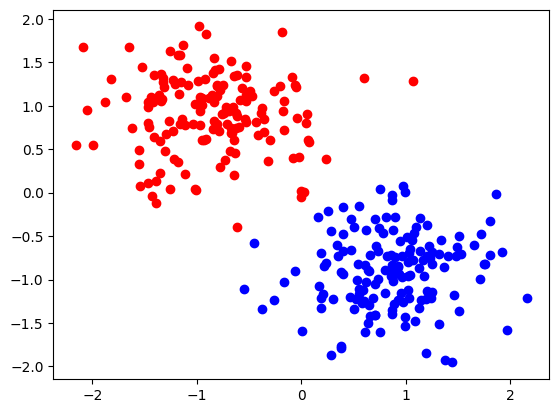

In [207]:
# Gerando dados
X, y = make_blobs(n_samples=300, centers=2, n_features=2, random_state=33)

# Normalizando os dados
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plotando os dados
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')
plt.show()


In [208]:
# Ajustando em um modelo caixa preta
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)
model.fit(X_train, y_train)

# Avaliando o modelo
y_pred = model.predict(X_test)
print("Acurácia:", sklearn.metrics.accuracy_score(y_test, y_pred))

Acurácia: 1.0


Instância: [ 0.2 -0.1]
Classe real: 1


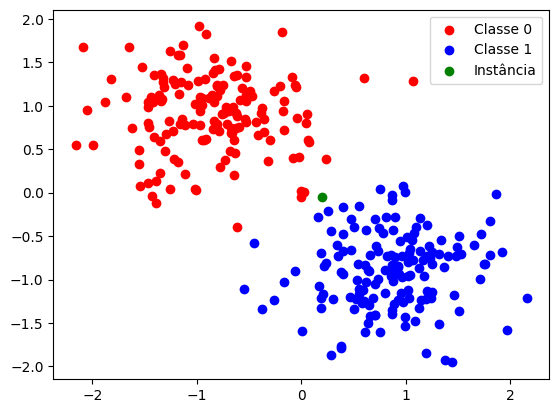

In [209]:
# Explicando uma instância 
xi = np.array([0.2,-0.05])
print("Instância:", xi)
print("Classe real:", model.predict([xi])[0])

# Mostrando a instância
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')
plt.scatter(xi[0], xi[1], color='green')
plt.legend(["Classe 0", "Classe 1", "Instância"])
plt.show()


In [210]:
# Explicando a instância 
explainer = lime_functions.LimeExplainer()
X_lime, y_lime, weights, coef = explainer.explain_instance(xi, 1000, 2, model)


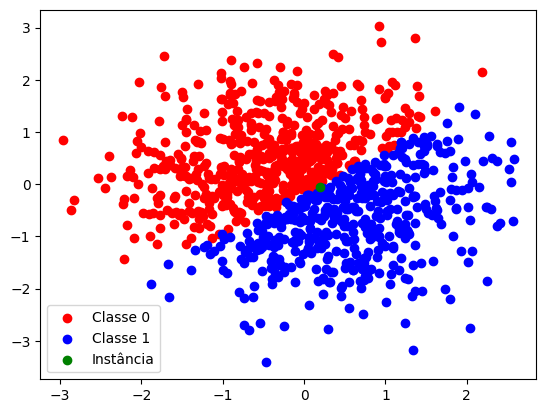

In [211]:
# Plota X_lime e y_lime
plt.scatter(X_lime[y_lime==0][:,0], X_lime[y_lime==0][:,1], color='red')
plt.scatter(X_lime[y_lime==1][:,0], X_lime[y_lime==1][:,1], color='blue')
plt.scatter(xi[0], xi[1], color='green')
plt.legend(["Classe 0", "Classe 1", "Instância"])
plt.show()

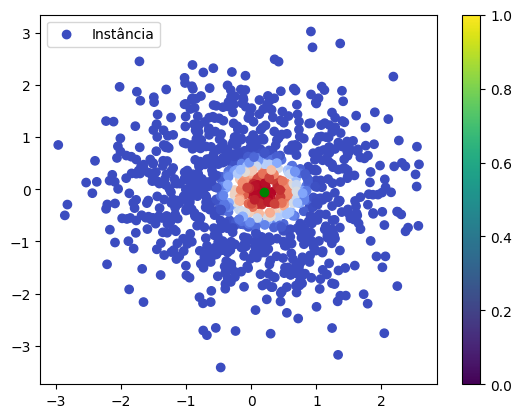

In [212]:
# Plota os pesos
plt.scatter(X_lime[:,0], X_lime[:,1], c=weights, cmap='coolwarm')
plt.scatter(xi[0], xi[1], color='green')
plt.colorbar()
plt.legend(["Instância"])
plt.show()

In [213]:
# Coeficientes do modelo linear
print("Coeficientes:", coef)


Coeficientes: [[ 2.9 -4. ]]


### Explicações

Nesse exemplo simples podemos ver o funcionamento do LIME em cada uma de suas etapas. Geramos e treinamos os dados com uma rede neural e escolhemos propositalmente uma instância na fronteira entre as duas classes para ver se o modelo funciona corretamente. Ao gerar as perturbações podemos ver que suas classificações estão de acordo com o modelo gerador de dados original e também podemos observar que os pesos atribuidos a elas é maior quanto mais próximo das instâncias.
O resultado final que queremos analisar é o coeficiente, o primeiro é positivo, o que significa que quando x1 aumenta, a probabilidade de pertencer a classe 1 aumenta, o segundo coeficiente é negativo, isso significa que quando x2 aumenta, a probabilidade de pertencer a classe 1 diminui. Vejamos outro exemplo na instância (1,-1) ambos os coeficientes são aproximadamente nulos, pois na proximidade da nova instância nenhuma feature influencia significativamente na classificação.

Instância: [ 1 -1]
Classe real: 1


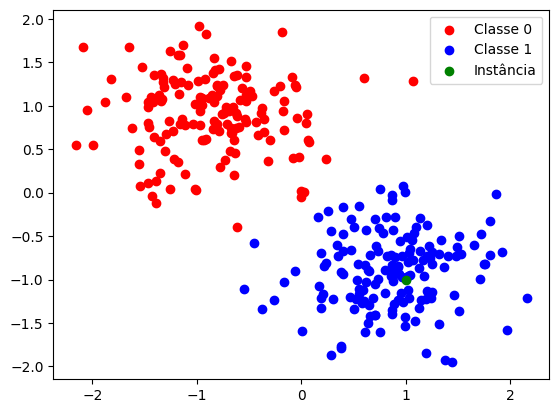

Coeficientes: [[-2.5e-05 -2.8e-05]]


In [214]:
# Explicando uma instância 
xi = np.array([1,-1])
print("Instância:", xi)
print("Classe real:", model.predict([xi])[0])

# Mostrando a instância
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')
plt.scatter(xi[0], xi[1], color='green')
plt.legend(["Classe 0", "Classe 1", "Instância"])
plt.show()

lime = lime_functions.LimeExplainer()
X_lime, y_lime, weights, coef = lime.explain_instance(xi, 1000, 2, model)
print("Coeficientes:", coef)



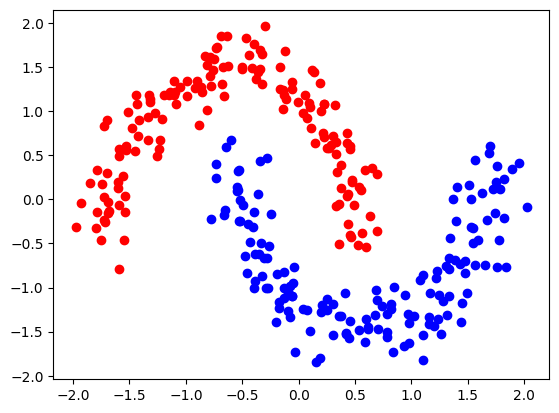

In [215]:
# two moons 
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=300, noise=0.1, random_state=42)

# Normalizando os dados
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

# Separando os dados
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Plotando os dados
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')
plt.show()


In [216]:
# Ajustando em um modelo caixa preta]
model = sklearn.neural_network.MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)
model.fit(X_train, y_train)

# Avaliando o modelo
y_pred = model.predict(X_test)
print("Acurácia:", sklearn.metrics.accuracy_score(y_test, y_pred))



Acurácia: 1.0


Instância: [0.2 0.5]
Classe real: 0


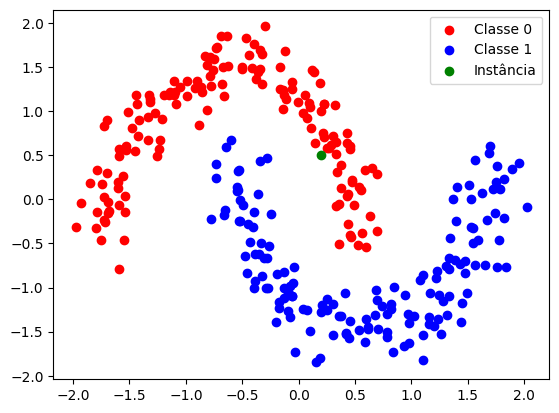

In [217]:
# Explicando uma instância
xi = np.array([0.2,0.5])
print("Instância:", xi)
print("Classe real:", model.predict([xi])[0])

# Mostrando a instância
plt.scatter(X[y==0][:,0], X[y==0][:,1], color='red')
plt.scatter(X[y==1][:,0], X[y==1][:,1], color='blue')
plt.scatter(xi[0], xi[1], color='green')
plt.legend(["Classe 0", "Classe 1", "Instância"])
plt.show()

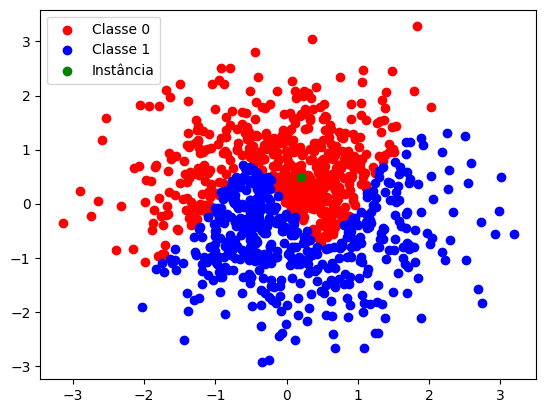

In [218]:
# Explicando a instância
explainer = lime_functions.LimeExplainer()
X_lime, y_lime, weights, coef = explainer.explain_instance(xi, 1000, 2, model)

# Plota X_lime e y_lime
plt.scatter(X_lime[y_lime==0][:,0], X_lime[y_lime==0][:,1], color='red')
plt.scatter(X_lime[y_lime==1][:,0], X_lime[y_lime==1][:,1], color='blue')
plt.scatter(xi[0], xi[1], color='green')
plt.legend(["Classe 0", "Classe 1", "Instância"])
plt.show()


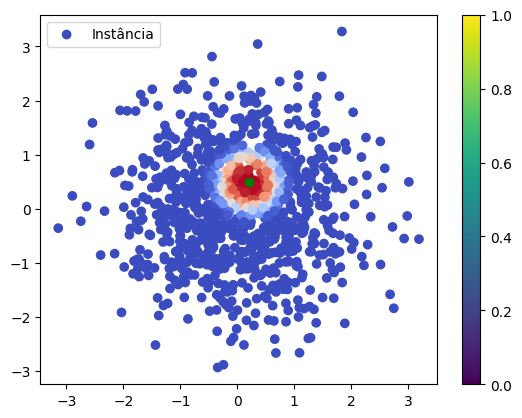

In [219]:
# Plota os pesos
plt.scatter(X_lime[:,0], X_lime[:,1], c=weights, cmap='coolwarm')
plt.scatter(xi[0], xi[1], color='green')
plt.colorbar()
plt.legend(["Instância"])
plt.show()


In [220]:
# Coeficientes do modelo linear
print("Coeficientes:", coef)

Coeficientes: [[-2.5 -0.5]]


### Exemplo com texto

In [197]:
# Exemplo de conjunto de dados de resenhas
dados = pd.read_csv('dados.csv', sep=';')

# Separar as features e o alvo
X = dados['review']
y = dados['sentimentos']

In [198]:
# Escolher uma instância para fazer a previsão
instance_index = 15
instance = X.iloc[instance_index]
instance_label = y.iloc[instance_index]
print('Instância:', instance)
print('Rótulo:', instance_label)

Instância: Nunca vi algo tão ruim na minha vida. A produção foi amadora e a história, entediante.
Rótulo: 0


In [199]:
# Deixar stopwords
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)
x = X_vectorized[instance_index]
# Separar os dados
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.3, random_state=42)

In [200]:
# Retira stopwords
stop_words = stopwords.words('portuguese')
X_sw = X.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Vetorização do texto
vectorizer_sw = TfidfVectorizer()
X_vectorized_sw = vectorizer_sw.fit_transform(X_sw)
x_sw = X_vectorized_sw[instance_index]
# Dividir os dados em conjuntos de treino e teste
X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(X_vectorized_sw, y, test_size=0.3, random_state=42)

Random forest

In [ ]:
# Treinamento do modelo de floresta aleatória
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões com o modelo de floresta aleatória
rf_y_pred = rf_model.predict(X_test)

# Avaliar o modelo de floresta aleatória
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_y_pred)}')
print(classification_report(y_test, rf_y_pred))

In [ ]:
# Treinamento do modelo de floresta aleatória sem stopwords
rf_model_sw = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model_sw.fit(X_train_sw, y_train_sw)

# Fazer previsões com o modelo de floresta aleatória sem stopwords
rf_y_pred_sw = rf_model_sw.predict(X_test_sw)

# Avaliar o modelo de floresta aleatória sem stopwords
print(f'Random Forest Accuracy (sem stopwords): {accuracy_score(y_test_sw, rf_y_pred_sw)}')
print(classification_report(y_test_sw, rf_y_pred_sw))

In [ ]:
LIME = lime_functions.LimeExplainerSentences(vectorizer=vectorizer, model=rf_model)
LIME.explain_instance(x)

In [ ]:
LIME = lime_functions.LimeExplainerSentences(vectorizer=vectorizer_sw, model=rf_model_sw)
LIME.explain_instance(x_sw)

MLP

In [ ]:
# Treinamento do modelo de rede neural
nn_model_sw = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=1000)
nn_model_sw.fit(X_train_sw, y_train_sw)

# Fazer previsões com o modelo de rede neural
nn_y_pred_sw = nn_model_sw.predict(X_test_sw)

# Avaliar o modelo de rede neural
print(f'Neural Network Accuracy: {accuracy_score(y_test_sw, nn_y_pred_sw)}')
print(classification_report(y_test_sw, nn_y_pred_sw))

In [ ]:

# Treinamento do modelo de rede neural
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Fazer previsões com o modelo de rede neural
nn_y_pred = nn_model.predict(X_test)

# Avaliar o modelo de rede neural
print(f'Neural Network Accuracy: {accuracy_score(y_test, nn_y_pred)}')
print(classification_report(y_test, nn_y_pred))


In [ ]:
LIME = lime_functions.LimeExplainerSentences(vectorizer=vectorizer, model=nn_model)
LIME.explain_instance(x)

In [ ]:
LIME = lime_functions.LimeExplainerSentences(vectorizer=vectorizer_sw, model=nn_model_sw)
LIME.explain_instance(x_sw)

Gradiend boosting

## Análise do modelo original

In [ ]:
# Explicador LIME
import lime
import lime.lime_text
from sklearn.pipeline import make_pipeline
from lime.lime_text import LimeTextExplainer


In [ ]:
# Exemplo de conjunto de dados de resenhas
dados = pd.read_csv('dados.csv', sep=';')

# Separar as features e o alvo
X = dados['review']
y = dados['sentimentos']

Instância a ser analisada

In [ ]:
# Escolher uma instância para fazer a previsão
instance_index = 15
instance = X.iloc[instance_index]
instance_label = y.iloc[instance_index]
print('Instância:', instance)
print('Rótulo:', instance_label)

Faremos uma análise com e sem stop-words

In [ ]:
# Retirar stop-words
stop_words = stopwords.words('portuguese')
X_sw = X.apply(lambda x: ' '.join([word for word in x.split() if word not in (stop_words)]))

# Vetorização do texto
vectorizer_sw = TfidfVectorizer()
X_vectorized_sw = vectorizer_sw.fit_transform(X_sw)

# Dividir os dados em conjuntos de treino e teste
X_train_sw, X_test_sw, y_train_sw, y_test_sw = train_test_split(X_vectorized_sw, y, test_size=0.2, random_state=42)

In [ ]:
# Deixar stopwords
vectorizer = TfidfVectorizer()
X_vectorized = vectorizer.fit_transform(X)

# Dividir os dados em conjuntos de treino e teste
X_train, X_test, y_train, y_test = train_test_split(X_vectorized, y, test_size=0.2, random_state=42)

### Random Forest

Sem stop-words

In [ ]:
# Treinamento do modelo de floresta aleatória
model_rf_sw = RandomForestClassifier(random_state=42)
model_rf_sw.fit(X_train_sw, y_train_sw)

# Predição e avaliação do modelo
y_pred_rf_sw = model_rf_sw.predict(X_test_sw)

# Acurácia e métricas
print('Acurácia do modelo de floresta aleatória sem stopwords:', accuracy_score(y_test_sw, y_pred_rf_sw))
print(classification_report(y_test_sw, y_pred_rf_sw))



Com stop-words

In [ ]:
# Treinamento do modelo de floresta aleatória
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Fazer previsões com o modelo de floresta aleatória
rf_y_pred = rf_model.predict(X_test)

# Avaliar o modelo de floresta aleatória
print(f'Random Forest Accuracy: {accuracy_score(y_test, rf_y_pred)}')
print(classification_report(y_test, rf_y_pred))

In [ ]:
# SEM STOPWORDS
pipeline_rf_sw = make_pipeline(vectorizer_sw, model_rf_sw)
explainer_rf_sw = LimeTextExplainer(class_names=['negativo', 'positivo'])
exp_rf_sw = explainer_rf_sw.explain_instance(instance, pipeline_rf_sw.predict_proba, num_features=3)

# Mostrar a explicação
exp_rf_sw.show_in_notebook(text=True)



In [ ]:
# COM STOPWORDS
pipeline_rf = make_pipeline(vectorizer, rf_model)
explainer_rf = LimeTextExplainer(class_names=['negativo', 'positivo'])
exp_rf = explainer_rf.explain_instance(instance, pipeline_rf.predict_proba, num_features=3)

# Mostrar a explicação
exp_rf.show_in_notebook(text=True)


### Multi-layer Perceptron

Sem stop-words

In [ ]:
# Treinamento do modelo de rede neural
nn_model_sw = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
nn_model_sw.fit(X_train_sw, y_train)

# Fazer previsões com o modelo de rede neural
y_pred_nn_sw = nn_model_sw.predict(X_test_sw)

# Avaliar o modelo de rede neural
print('Acurácia do modelo de rede neural sem stopwords:', accuracy_score(y_test, y_pred_nn_sw))
print(classification_report(y_test, y_pred_nn_sw))



Com stop-words

In [ ]:

# Treinamento do modelo de rede neural
nn_model = MLPClassifier(hidden_layer_sizes=(100, 100), max_iter=1000, random_state=42)
nn_model.fit(X_train, y_train)

# Fazer previsões com o modelo de rede neural
nn_y_pred = nn_model.predict(X_test)

# Avaliar o modelo de rede neural
print(f'Neural Network Accuracy: {accuracy_score(y_test, nn_y_pred)}')
print(classification_report(y_test, nn_y_pred))


In [ ]:
# Pipeline para o modelo de rede neural sem stopwords
pipeline_nn_sw = make_pipeline(vectorizer_sw, nn_model_sw)
explainer_nn_sw = LimeTextExplainer(class_names=['negativo', 'positivo'])
exp_nn_sw = explainer_nn_sw.explain_instance(instance, pipeline_nn_sw.predict_proba, num_features=3)

# Mostrar a explicação
exp_nn_sw.show_in_notebook(text=True)

In [ ]:
# Pipeline para o modelo de rede neural
pipeline_nn = make_pipeline(vectorizer, nn_model)
explainer_nn = LimeTextExplainer(class_names=['negativo', 'positivo'])
exp_nn = explainer_nn.explain_instance(instance, pipeline_nn.predict_proba, num_features=3)

# Mostrar a explicação
exp_nn.show_in_notebook(text=True)

### Gradient Boosting

Sem stop-words

In [ ]:
# Treinamento do modelo de Gradient Boosting
gb_model_sw = GradientBoostingClassifier(random_state=42)
gb_model_sw.fit(X_train_sw, y_train)

# Fazer previsões com o modelo de Gradient Boosting
y_pred_gb_sw = gb_model_sw.predict(X_test_sw)

# Avaliar o modelo de Gradient Boosting
print('Acurácia do modelo de Gradient Boosting sem stopwords:', accuracy_score(y_test, y_pred_gb_sw))
print(classification_report(y_test, y_pred_gb_sw))


Com stop-words

In [ ]:
# Treinamento do modelo de Gradient Boosting
gb_model = GradientBoostingClassifier(n_estimators=100, random_state=42)
gb_model.fit(X_train, y_train)

# Fazer previsões com o modelo de Gradient Boosting
gb_y_pred = gb_model.predict(X_test)

# Avaliar o modelo de Gradient Boosting
print(f'Gradient Boosting Accuracy: {accuracy_score(y_test, gb_y_pred)}')
print(classification_report(y_test, gb_y_pred))

In [ ]:
# Pipeline para o modelo de Gradient Boosting sem stopwords
pipeline_gb_sw = make_pipeline(vectorizer_sw, gb_model_sw)
explainer_gb_sw = LimeTextExplainer(class_names=['negativo', 'positivo'])
exp_gb_sw = explainer_gb_sw.explain_instance(instance, pipeline_gb_sw.predict_proba, num_features=3)

# Mostrar a explicação
exp_gb_sw.show_in_notebook(text=True)


In [ ]:
# Pipeline para o modelo de Gradient Boosting
pipeline_gb = make_pipeline(vectorizer, gb_model)
explainer_gb = LimeTextExplainer(class_names=['negativo', 'positivo'])
exp_gb = explainer_gb.explain_instance(instance, pipeline_gb.predict_proba, num_features=3)

# Mostrar a explicação
exp_gb.show_in_notebook(text=True)

### Análise:

Treinamos 3 modelos, com e sem stop words, e obtivemos suas explicações. É possível analisar algumas características interessantes desse experimento:

- O lime é útil para verificar qual modelo é mais adequado: 
Todos os modelos analisados possuem acurácia similar, com exceção do MLP sem stop words que possui acurácia mais baixa, portanto, uma forma de decidir entre eles é ver suas explicações. Note que o random forest não retorna boa explicações, assim como o MLP sem stop-words, portanto, em um impasse em escolher entre os 3 modelos o gradient boost retorna resultados melhores.

- O lime é sensível a pequenas mudanças:
Era esperado que as palavras significativas com maiores pesos em uma frase fossem a mesma se o modelo é treinado com ou sem stop words, mas isso não ocorre. Veja o gradient boost, por exemplo, a segunda e terceira palavras mais importantes mudam na análise com e sem stop words mesmo sendo significativas em ambas, isso demonstra certa instabilidade do lime.